In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_DIR = "/home/abhishar/Downloads/backup/flowers/"

In [3]:
IMG_SHAPE = (150, 150, 3)

In [4]:
import os

In [5]:
import random

In [6]:
lookup = pd.read_csv(DATA_DIR+"train.csv")
lookup.head()

,image_id,category
0,0,77
1,1,81
2,2,52
3,3,72
4,4,58


In [7]:
labels = pd.get_dummies(lookup.category)
labels.head()

,1,2,3,4,5,6,7,8,9,10,...,93,94,95,96,97,98,99,100,101,102
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 102 artists>

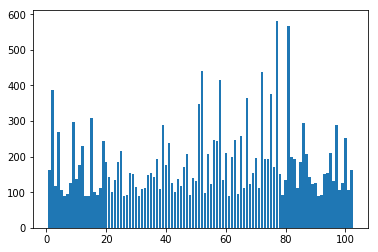

In [8]:
plt.bar(height=lookup.category.value_counts(), x=lookup.category.unique())

In [9]:
lookup.category.min()

1

In [10]:
lookup.dtypes

image_id    int64
category    int64
dtype: object

In [11]:
categories = []
with open(DATA_DIR+"categories.txt") as f:
    for line in f.readlines():
        categories.append(line.strip())
categories[0]

'pink primrose'

In [12]:
len(categories)

102

In [13]:
import cv2

Text(0.5, 1.0, '11376.jpg : purple coneflower')

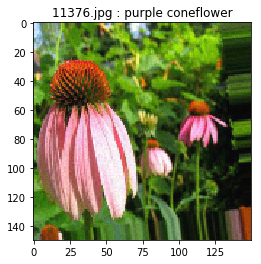

In [14]:
img_id = random.choice(os.listdir(DATA_DIR+"train/"))
img = plt.imread(DATA_DIR+"train/"+img_id)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = img/255
img = cv2.resize(img, IMG_SHAPE[:2])
plt.imshow(img)
plt.title(img_id+" : "+categories[lookup.loc[int(img_id[:-4]), "category"] -1])

In [15]:
img.dtype

dtype('uint8')

In [16]:
import sys
sys.getsizeof(img)/(1024*1024)

0.06449508666992188

In [17]:
0.064*20000/(1024*1024)

0.001220703125

In [18]:

from tqdm import tqdm, tqdm_gui, tqdm_notebook

In [19]:
num_images = len(os.listdir(DATA_DIR+"train/"))

In [20]:
X = np.zeros((num_images, img.shape[0], img.shape[1], img.shape[2]), dtype=np.uint8)

In [21]:
sys.getsizeof(X)/(1024**3)

1.1655037701129913

In [ ]:
img_list = list(os.listdir(DATA_DIR+"train/"))
for i in tqdm_notebook(range(len(img_list))):
    path = DATA_DIR + "train/" + str(i) + ".jpg"
    X[i, :, :, :] += cv2.resize(plt.imread(path), (img.shape[0], img.shape[1]))

In [ ]:
fig,  ax = plt.subplots(5, 5, figsize=(10,10))
random.seed(10)
for i in range(5):
    for j in range(5):
        img_id = random.randint(0, X.shape[0]-1)
        ax[i,j].imshow(X[img_id, :, :, :])
        ax[i,j].set_title(categories[lookup.loc[img_id,"category"]-1])
        ax[i,j].axis("off")

In [24]:
from tensorflow.keras.backend import clear_session

In [25]:
clear_session()

In [26]:
from tensorflow.keras.models import Model

In [27]:
from tensorflow.keras.applications import InceptionV3

In [28]:
inception = InceptionV3(weights="imagenet", include_top=False, input_shape=IMG_SHAPE)

W0829 17:37:52.141580 139895035176768 deprecation.py:506] From /home/abhishar/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [29]:
for layer in inception.layers:
    layer.trainable = False

In [30]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [31]:
# for layer in inception.layers[-28:]:
#     print(layer.name)
#     layer.trainable = True

In [32]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

batch_normalization_21 (BatchNo (None, 16, 16, 64)   192         conv2d_21[0][0]                  
__________________________________________________________________________________________________
batch_normalization_24 (BatchNo (None, 16, 16, 96)   288         conv2d_24[0][0]                  
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 16, 16, 64)   192         conv2d_25[0][0]                  
__________________________________________________________________________________________________
activation_19 (Activation)      (None, 16, 16, 64)   0           batch_normalization_19[0][0]     
__________________________________________________________________________________________________
activation_21 (Activation)      (None, 16, 16, 64)   0           batch_normalization_21[0][0]     
__________________________________________________________________________________________________
activation

In [33]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

In [34]:
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.8)(x)
y = Dense(102, activation="softmax")(x)

W0829 17:38:11.534081 139895035176768 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


In [35]:
model = Model(inputs=inception.input, outputs=y)

In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [37]:
from tensorflow.keras.callbacks import TensorBoard

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(rescale=1/255, rotation_range=60, width_shift_range=0.2,
                              height_shift_range = 0.2, shear_range=0.2, zoom_range=0.1,
                              horizontal_flip=True, fill_mode="nearest")

In [39]:
train_ind = np.random.choice(range(X.shape[0]), int(X.shape[0]*0.75), replace=False)
test_ind = np.array([i for i in range(X.shape[0]) if i not in train_ind])

In [40]:
train_generator = data_gen.flow(X[train_ind], labels.loc[train_ind], batch_size=64)
test_generator = data_gen.flow(X[test_ind], labels.loc[test_ind])

In [41]:
len(train_generator)

218

In [42]:
from tensorflow.keras.optimizers import Adam, RMSprop

In [43]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["acc"])

In [44]:
history = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=100, callbacks=[TensorBoard()])

Epoch 1/100
218/218 [==============================] - 213s 978ms/step - loss: 4.5872 - acc: 0.0327 - val_loss: 4.4363 - val_acc: 0.0740
Epoch 2/100
218/218 [==============================] - 190s 872ms/step - loss: 4.3819 - acc: 0.0594 - val_loss: 4.2525 - val_acc: 0.0757
Epoch 3/100
218/218 [==============================] - 191s 878ms/step - loss: 4.2097 - acc: 0.0821 - val_loss: 4.1738 - val_acc: 0.0835
Epoch 4/100
218/218 [==============================] - 190s 873ms/step - loss: 4.0922 - acc: 0.0969 - val_loss: 4.1566 - val_acc: 0.1025
Epoch 5/100
218/218 [==============================] - 191s 876ms/step - loss: 3.9866 - acc: 0.1067 - val_loss: 3.9737 - val_acc: 0.0964
Epoch 6/100
218/218 [==============================] - 187s 856ms/step - loss: 3.8695 - acc: 0.1260 - val_loss: 4.2848 - val_acc: 0.0906
Epoch 7/100
218/218 [==============================] - 186s 855ms/step - loss: 3.7913 - acc: 0.1310 - val_loss: 4.2354 - val_acc: 0.0865
Epoch 8/100
218/218 [====================

KeyboardInterrupt: 

In [ ]:
# history = model.fit(X, labels, validation_split=0.25, epochs=10)

In [53]:
clear_session()

In [54]:
from tensorflow.keras.applications import VGG19

In [55]:
vgg = VGG19(weights="imagenet", include_top=False, input_shape=IMG_SHAPE, pooling="avg")

In [56]:
for layer in vgg.layers:
    layer.trainable = False

In [57]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [58]:
x = vgg.output
y = Dense(102, activation="softmax")(x)
model = Model(inputs=vgg.input, outputs=y)

In [59]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [60]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["acc"])

In [61]:
history = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=20, callbacks=[TensorBoard()])

Epoch 1/20
218/218 [==============================] - 669s 3s/step - loss: 4.1173 - acc: 0.1108 - val_loss: 3.7138 - val_acc: 0.1588
Epoch 2/20
218/218 [==============================] - 625s 3s/step - loss: 3.4185 - acc: 0.2815 - val_loss: 3.1973 - val_acc: 0.3605
Epoch 3/20
218/218 [==============================] - 624s 3s/step - loss: 2.9817 - acc: 0.3833 - val_loss: 2.8544 - val_acc: 0.3953
Epoch 4/20
218/218 [==============================] - 632s 3s/step - loss: 2.6754 - acc: 0.4460 - val_loss: 2.6013 - val_acc: 0.4645
Epoch 5/20
218/218 [==============================] - 618s 3s/step - loss: 2.4455 - acc: 0.4811 - val_loss: 2.4153 - val_acc: 0.4921
Epoch 6/20
218/218 [==============================] - 615s 3s/step - loss: 2.2814 - acc: 0.5112 - val_loss: 2.2899 - val_acc: 0.5001
Epoch 7/20
218/218 [==============================] - 616s 3s/step - loss: 2.1435 - acc: 0.5379 - val_loss: 2.1623 - val_acc: 0.5266
Epoch 8/20
218/218 [==============================] - 615s 3s/step - 

In [62]:
model.save("model_01.h5")

In [63]:
history = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=3, callbacks=[TensorBoard()])

Epoch 1/3
218/218 [==============================] - 620s 3s/step - loss: 1.3841 - acc: 0.6740 - val_loss: 1.4961 - val_acc: 0.6369
Epoch 2/3
218/218 [==============================] - 619s 3s/step - loss: 1.3627 - acc: 0.6757 - val_loss: 1.4767 - val_acc: 0.6324
Epoch 3/3
218/218 [==============================] - 625s 3s/step - loss: 1.3349 - acc: 0.6800 - val_loss: 1.4526 - val_acc: 0.6494


In [64]:
history_2 = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=2, callbacks=[TensorBoard()])

Epoch 1/2
218/218 [==============================] - 624s 3s/step - loss: 1.3093 - acc: 0.6885 - val_loss: 1.4496 - val_acc: 0.6438
Epoch 2/2
218/218 [==============================] - 618s 3s/step - loss: 1.3011 - acc: 0.6851 - val_loss: 1.4308 - val_acc: 0.6460


In [65]:
history_3 = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=3, callbacks=[TensorBoard()])

Epoch 1/3
218/218 [==============================] - 627s 3s/step - loss: 1.2788 - acc: 0.6874 - val_loss: 1.3988 - val_acc: 0.6546
Epoch 2/3
218/218 [==============================] - 616s 3s/step - loss: 1.2562 - acc: 0.6992 - val_loss: 1.3846 - val_acc: 0.6667
Epoch 3/3
218/218 [==============================] - 616s 3s/step - loss: 1.2319 - acc: 0.7042 - val_loss: 1.3705 - val_acc: 0.6570


In [66]:
history_3 = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=6, callbacks=[TensorBoard()])

Epoch 1/6
218/218 [==============================] - 626s 3s/step - loss: 1.2214 - acc: 0.7040 - val_loss: 1.3461 - val_acc: 0.6716
Epoch 2/6
218/218 [==============================] - 623s 3s/step - loss: 1.1988 - acc: 0.7118 - val_loss: 1.3332 - val_acc: 0.6697
Epoch 3/6
218/218 [==============================] - 618s 3s/step - loss: 1.1879 - acc: 0.7104 - val_loss: 1.3397 - val_acc: 0.6634
Epoch 4/6
218/218 [==============================] - 615s 3s/step - loss: 1.1754 - acc: 0.7155 - val_loss: 1.3209 - val_acc: 0.6699
Epoch 5/6
218/218 [==============================] - 624s 3s/step - loss: 1.1632 - acc: 0.7181 - val_loss: 1.3075 - val_acc: 0.6693
Epoch 6/6
218/218 [==============================] - 621s 3s/step - loss: 1.1449 - acc: 0.7200 - val_loss: 1.2776 - val_acc: 0.6818


In [67]:
history_3 = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=6, callbacks=[TensorBoard()])

Epoch 1/6
218/218 [==============================] - 626s 3s/step - loss: 1.1404 - acc: 0.7177 - val_loss: 1.2728 - val_acc: 0.6813
Epoch 2/6
218/218 [==============================] - 624s 3s/step - loss: 1.1232 - acc: 0.7206 - val_loss: 1.2693 - val_acc: 0.6783
Epoch 3/6
218/218 [==============================] - 616s 3s/step - loss: 1.1132 - acc: 0.7273 - val_loss: 1.2711 - val_acc: 0.6746
Epoch 4/6
218/218 [==============================] - 613s 3s/step - loss: 1.1081 - acc: 0.7294 - val_loss: 1.2366 - val_acc: 0.6872
Epoch 5/6
218/218 [==============================] - 612s 3s/step - loss: 1.0882 - acc: 0.7323 - val_loss: 1.2136 - val_acc: 0.6919
Epoch 6/6
218/218 [==============================] - 611s 3s/step - loss: 1.0919 - acc: 0.7300 - val_loss: 1.2327 - val_acc: 0.6893


In [68]:
model.save("model_02.h5")
model.save_weights("weights_02.h5")

In [69]:
history_3 = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=6, callbacks=[TensorBoard()])

Epoch 1/6
218/218 [==============================] - 611s 3s/step - loss: 1.0839 - acc: 0.7295 - val_loss: 1.2229 - val_acc: 0.6990
Epoch 2/6
218/218 [==============================] - 611s 3s/step - loss: 1.0584 - acc: 0.7344 - val_loss: 1.2011 - val_acc: 0.6936
Epoch 3/6
218/218 [==============================] - 611s 3s/step - loss: 1.0563 - acc: 0.7366 - val_loss: 1.2019 - val_acc: 0.7016
Epoch 4/6
218/218 [==============================] - 611s 3s/step - loss: 1.0441 - acc: 0.7392 - val_loss: 1.1825 - val_acc: 0.6962
Epoch 5/6
218/218 [==============================] - 611s 3s/step - loss: 1.0406 - acc: 0.7382 - val_loss: 1.1845 - val_acc: 0.6971
Epoch 6/6
218/218 [==============================] - 611s 3s/step - loss: 1.0298 - acc: 0.7462 - val_loss: 1.1671 - val_acc: 0.6999


In [70]:
model.save("model_02.h5")
model.save_weights("weights_02.h5")

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
early_stop = EarlyStopping(patience=5)

In [73]:
history_3 = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=20, callbacks=[TensorBoard(), early_stop])

Epoch 1/20
218/218 [==============================] - 619s 3s/step - loss: 1.0197 - acc: 0.7435 - val_loss: 1.1506 - val_acc: 0.7092
Epoch 2/20
218/218 [==============================] - 615s 3s/step - loss: 1.0104 - acc: 0.7483 - val_loss: 1.1594 - val_acc: 0.7029
Epoch 3/20
218/218 [==============================] - 616s 3s/step - loss: 1.0028 - acc: 0.7483 - val_loss: 1.1514 - val_acc: 0.7105
Epoch 4/20
218/218 [==============================] - 615s 3s/step - loss: 0.9945 - acc: 0.7544 - val_loss: 1.1336 - val_acc: 0.7122
Epoch 5/20
218/218 [==============================] - 616s 3s/step - loss: 0.9890 - acc: 0.7524 - val_loss: 1.1267 - val_acc: 0.7128
Epoch 6/20
218/218 [==============================] - 615s 3s/step - loss: 0.9856 - acc: 0.7513 - val_loss: 1.1410 - val_acc: 0.7113
Epoch 7/20
218/218 [==============================] - 654s 3s/step - loss: 0.9667 - acc: 0.7559 - val_loss: 1.1233 - val_acc: 0.7139
Epoch 8/20
218/218 [==============================] - 614s 3s/step - 

In [74]:
history_4 = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=20, callbacks=[TensorBoard(), early_stop])

Epoch 1/20
218/218 [==============================] - 614s 3s/step - loss: 0.8902 - acc: 0.7741 - val_loss: 1.0488 - val_acc: 0.7284
Epoch 2/20
218/218 [==============================] - 615s 3s/step - loss: 0.8873 - acc: 0.7732 - val_loss: 1.0469 - val_acc: 0.7187
Epoch 3/20
218/218 [==============================] - 624s 3s/step - loss: 0.8821 - acc: 0.7753 - val_loss: 1.0551 - val_acc: 0.7260
Epoch 4/20
218/218 [==============================] - 615s 3s/step - loss: 0.8869 - acc: 0.7720 - val_loss: 1.0541 - val_acc: 0.7245
Epoch 5/20
218/218 [==============================] - 615s 3s/step - loss: 0.8625 - acc: 0.7812 - val_loss: 1.0399 - val_acc: 0.7312
Epoch 6/20
218/218 [==============================] - 616s 3s/step - loss: 0.8660 - acc: 0.7778 - val_loss: 1.0268 - val_acc: 0.7338
Epoch 7/20
218/218 [==============================] - 651s 3s/step - loss: 0.8694 - acc: 0.7765 - val_loss: 1.0534 - val_acc: 0.7243
Epoch 8/20
218/218 [==============================] - 615s 3s/step - 

In [75]:
history_5 = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=20, callbacks=[TensorBoard(), early_stop])

Epoch 1/20
218/218 [==============================] - 614s 3s/step - loss: 0.8136 - acc: 0.7906 - val_loss: 0.9897 - val_acc: 0.7366
Epoch 2/20
218/218 [==============================] - 615s 3s/step - loss: 0.8027 - acc: 0.7910 - val_loss: 0.9629 - val_acc: 0.7482
Epoch 3/20
218/218 [==============================] - 615s 3s/step - loss: 0.7998 - acc: 0.7915 - val_loss: 0.9739 - val_acc: 0.7450
Epoch 4/20
218/218 [==============================] - 616s 3s/step - loss: 0.8083 - acc: 0.7887 - val_loss: 0.9703 - val_acc: 0.7433
Epoch 5/20
218/218 [==============================] - 615s 3s/step - loss: 0.8064 - acc: 0.7855 - val_loss: 0.9669 - val_acc: 0.7389
Epoch 6/20
218/218 [==============================] - 616s 3s/step - loss: 0.8010 - acc: 0.7912 - val_loss: 0.9809 - val_acc: 0.7310
Epoch 7/20
218/218 [==============================] - 684s 3s/step - loss: 0.8007 - acc: 0.7920 - val_loss: 0.9746 - val_acc: 0.7435


In [76]:
history_6 = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=20, callbacks=[TensorBoard(), early_stop])

Epoch 1/20
218/218 [==============================] - 615s 3s/step - loss: 0.7915 - acc: 0.7955 - val_loss: 0.9598 - val_acc: 0.7461
Epoch 2/20
218/218 [==============================] - 613s 3s/step - loss: 0.7954 - acc: 0.7943 - val_loss: 0.9520 - val_acc: 0.7487
Epoch 3/20
218/218 [==============================] - 611s 3s/step - loss: 0.7877 - acc: 0.7971 - val_loss: 0.9708 - val_acc: 0.7420
Epoch 4/20
218/218 [==============================] - 612s 3s/step - loss: 0.7867 - acc: 0.7971 - val_loss: 0.9619 - val_acc: 0.7465
Epoch 5/20
218/218 [==============================] - 616s 3s/step - loss: 0.7883 - acc: 0.7917 - val_loss: 0.9619 - val_acc: 0.7443
Epoch 6/20
218/218 [==============================] - 612s 3s/step - loss: 0.7896 - acc: 0.7900 - val_loss: 0.9600 - val_acc: 0.7392
Epoch 7/20
218/218 [==============================] - 615s 3s/step - loss: 0.7808 - acc: 0.7965 - val_loss: 0.9442 - val_acc: 0.7439
Epoch 8/20
218/218 [==============================] - 612s 3s/step - 

In [77]:
model.save_weights("weights_03.h5")

In [79]:
history_7 = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=50, callbacks=[TensorBoard(), early_stop])
model.save_weights("weights_04.h5")

In [80]:
history_8 = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=50, callbacks=[TensorBoard(), early_stop])
model.save_weights("weights_05.h5")

Epoch 1/50
218/218 [==============================] - 627s 3s/step - loss: 0.7290 - acc: 0.8068 - val_loss: 0.8912 - val_acc: 0.7575
Epoch 2/50
218/218 [==============================] - 625s 3s/step - loss: 0.7235 - acc: 0.8083 - val_loss: 0.8925 - val_acc: 0.7603
Epoch 3/50
218/218 [==============================] - 615s 3s/step - loss: 0.7252 - acc: 0.8076 - val_loss: 0.9057 - val_acc: 0.7566
Epoch 4/50
218/218 [==============================] - 626s 3s/step - loss: 0.7166 - acc: 0.8096 - val_loss: 0.8755 - val_acc: 0.7635
Epoch 5/50
218/218 [==============================] - 616s 3s/step - loss: 0.7247 - acc: 0.8065 - val_loss: 0.8925 - val_acc: 0.7646
Epoch 6/50
218/218 [==============================] - 616s 3s/step - loss: 0.7149 - acc: 0.8108 - val_loss: 0.8991 - val_acc: 0.7532
Epoch 7/50
218/218 [==============================] - 614s 3s/step - loss: 0.7181 - acc: 0.8075 - val_loss: 0.8870 - val_acc: 0.7571
Epoch 8/50
218/218 [==============================] - 615s 3s/step - 

In [82]:
history_9 = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=50, callbacks=[TensorBoard(), early_stop])
model.save_weights("weights_06.h5")

Epoch 1/50
218/218 [==============================] - 613s 3s/step - loss: 0.6962 - acc: 0.8166 - val_loss: 0.8775 - val_acc: 0.7556
Epoch 2/50
218/218 [==============================] - 611s 3s/step - loss: 0.7016 - acc: 0.8114 - val_loss: 0.8795 - val_acc: 0.7597
Epoch 3/50
218/218 [==============================] - 632s 3s/step - loss: 0.6821 - acc: 0.8183 - val_loss: 0.8632 - val_acc: 0.7666
Epoch 4/50
218/218 [==============================] - 613s 3s/step - loss: 0.6877 - acc: 0.8176 - val_loss: 0.8709 - val_acc: 0.7616
Epoch 5/50
218/218 [==============================] - 771s 4s/step - loss: 0.6897 - acc: 0.8188 - val_loss: 0.8574 - val_acc: 0.7612
Epoch 6/50
218/218 [==============================] - 787s 4s/step - loss: 0.6887 - acc: 0.8184 - val_loss: 0.8861 - val_acc: 0.7564
Epoch 7/50
218/218 [==============================] - 786s 4s/step - loss: 0.6838 - acc: 0.8193 - val_loss: 0.8570 - val_acc: 0.7679
Epoch 8/50
218/218 [==============================] - 647s 3s/step - 

In [89]:
model.save("model_05.h5")

In [95]:
model.optimizer.lr

<tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32>

In [107]:
from tensorflow.keras.backend import eval

In [112]:
eval(model.optimizer.lr)

0.001

In [113]:
model.optimizer.epsilon

1e-07

In [115]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [135]:
eval(model.optimizer.lr.get_value())

AttributeError: 'ResourceVariable' object has no attribute 'get_value'

In [143]:
eval(model.optimizer.variables()[0])

35316

In [144]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model

In [ ]:
model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=1, callbacks=[TensorBoard(), early_stop])

 64/218 [=======>......................] - ETA: 5:30 - loss: 0.6743 - acc: 0.8170